<a href="https://colab.research.google.com/github/kcat28/CCDATSCL_PROJECT_COM221/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv("log_data1.csv")

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   Unnamed: 1     79 non-null     object 
 2   Unnamed: 2     77 non-null     object 
 3   (categorical)  79 non-null     object 
 4   (1-5)          77 non-null     object 
 5   (1-5).1        77 non-null     object 
 6   (1-5).2        77 non-null     object 
 7   (string)       76 non-null     object 
 8   (0 or 1)       77 non-null     object 
 9   (0 or 1).1     77 non-null     object 
 10  (0 or 1).2     77 non-null     object 
 11  (0 or 1).3     77 non-null     object 
 12  (string).1     77 non-null     object 
dtypes: float64(1), object(12)
memory usage: 8.2+ KB


## preprocessing

In [260]:
df.head(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,(categorical),(1-5),(1-5).1,(1-5).2,(string),(0 or 1),(0 or 1).1,(0 or 1).2,(0 or 1).3,(string).1
0,NaN,workday_id,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor


In [261]:
data_columns = df.iloc[0]

In [262]:
df.columns = data_columns
df.drop(0, inplace = True)

In [263]:
df.head()

,NaN,workday_id,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor
1,NaN,JAN20,11:23:00 AM,early,5,1,4,coding,1,0,1,1,NONE
2,NaN,JAN20,08:25:00 PM,mid,3,4,1,gaming,0,1,1,0,DISCORD W/ FRIENDS
3,NaN,JAN20,06:35:00 AM,late,1,1,5,sleep,0,0,0,0,NONE
4,NaN,JAN21,11:22:00 AM,early,1,5,1,leisure,0,1,0,1,BROWSING
5,NaN,JAN21,10:33:00 PM,mid,1,1,3,outside,0,0,0,0,NONE


In [264]:
df.drop(df.columns[0], axis=1, inplace=True)

In [265]:
df.set_index(df.columns[0], inplace=True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, JAN20 to FEB15
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                76 non-null     object
 1   block                    78 non-null     object
 2   focus_level              76 non-null     object
 3   distraction_level        76 non-null     object
 4   tired_level              76 non-null     object
 5   main_activity            75 non-null     object
 6   work_started_since_wake  76 non-null     object
 7   non_work_screen_use      76 non-null     object
 8   music_playing            76 non-null     object
 9   caffiene_last_log        76 non-null     object
 10  primary_distractor       76 non-null     object
dtypes: object(11)
memory usage: 7.3+ KB


In [267]:
df['block'].unique()

array(['early', 'mid', 'late', 'late ', 'early '], dtype=object)

In [268]:
df['block'] = df['block'].str.strip().str.lower()
print(df['block'].unique())

['early' 'mid' 'late']


In [269]:
display(df[df.isna().any(axis=1)])

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor
workday_id,,,,,,,,,,,
FEB5,NaN,mid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEB5,NaN,late,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEB6,07:00:00 PM,mid,1,1,4,NaN,0,0,0,0,NONE


In [270]:
df.head(1)

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor
workday_id,,,,,,,,,,,
JAN20,11:23:00 AM,early,5,1,4,coding,1,0,1,1,NONE


In [271]:
cols_mode = ['work_started_since_wake', 'non_work_screen_use', 'music_playing', 'caffiene_last_log']
cols_med = ['focus_level', 'distraction_level', 'tired_level']

In [272]:
df[cols_mode] = df.groupby('block')[cols_mode].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

for col in cols_med:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_med] = df.groupby('block')[cols_med].transform(
    lambda x: x.fillna(x.median())
)

In [273]:
display(df[df.isna().any(axis=1)])

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor
workday_id,,,,,,,,,,,
FEB5,NaN,mid,3.0,3.0,3.0,NaN,1,1,0,1,NaN
FEB5,NaN,late,3.0,2.0,3.0,NaN,1,1,0,0,NaN
FEB6,07:00:00 PM,mid,1.0,1.0,4.0,NaN,0,0,0,0,NONE


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, JAN20 to FEB15
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76 non-null     object 
 1   block                    78 non-null     object 
 2   focus_level              78 non-null     float64
 3   distraction_level        78 non-null     float64
 4   tired_level              78 non-null     float64
 5   main_activity            75 non-null     object 
 6   work_started_since_wake  78 non-null     object 
 7   non_work_screen_use      78 non-null     object 
 8   music_playing            78 non-null     object 
 9   caffiene_last_log        78 non-null     object 
 10  primary_distractor       76 non-null     object 
dtypes: float64(3), object(8)
memory usage: 9.4+ KB


In [275]:
df.head()

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor
workday_id,,,,,,,,,,,
JAN20,11:23:00 AM,early,5.0,1.0,4.0,coding,1,0,1,1,NONE
JAN20,08:25:00 PM,mid,3.0,4.0,1.0,gaming,0,1,1,0,DISCORD W/ FRIENDS
JAN20,06:35:00 AM,late,1.0,1.0,5.0,sleep,0,0,0,0,NONE
JAN21,11:22:00 AM,early,1.0,5.0,1.0,leisure,0,1,0,1,BROWSING
JAN21,10:33:00 PM,mid,1.0,1.0,3.0,outside,0,0,0,0,NONE


In [276]:
df['main_activity'].value_counts()



,count
main_activity,
to_do,6
watching,6
resting,6
code,6
sleep,5
gaming,4
outside,4
coding,4
data science,4


In [277]:
activity_map = {
    'coding': 'Productive', 'code': 'Productive', 'thesis': 'Productive',
    'thesis writing': 'Productive', 'thesis ppt': 'Productive',
    'last prep thesis': 'Productive', 'studying': 'Productive',

    'data science': 'Productive', 'triangulation': 'Productive',
    'defense': 'Productive', 'thesis ': 'Productive',

    'meeting': 'Productive', 'orientation': 'Productive',
    'to_do': 'Productive', 'tasks': 'Productive',
    'school': 'Productive', 'lecture': 'Productive',

    'gaming': 'Leisure', 'game': 'Leisure', 'watching': 'Leisure',
    'leisure': 'Leisure', 'phone': 'Leisure', 'browsing': 'Leisure',
    'reading manga': 'Leisure',

    'sleep': 'Recovery', 'rest': 'Recovery', 'resting': 'Recovery',
    'rest/ sleep': 'Recovery', 'outside': 'Recovery', 'workout': 'Recovery'
}

df['activity_category'] = df['main_activity'].map(activity_map)
df.head()

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor,activity_category
workday_id,,,,,,,,,,,,
JAN20,11:23:00 AM,early,5.0,1.0,4.0,coding,1,0,1,1,NONE,Productive
JAN20,08:25:00 PM,mid,3.0,4.0,1.0,gaming,0,1,1,0,DISCORD W/ FRIENDS,Leisure
JAN20,06:35:00 AM,late,1.0,1.0,5.0,sleep,0,0,0,0,NONE,Recovery
JAN21,11:22:00 AM,early,1.0,5.0,1.0,leisure,0,1,0,1,BROWSING,Leisure
JAN21,10:33:00 PM,mid,1.0,1.0,3.0,outside,0,0,0,0,NONE,Recovery


In [278]:
unmapped_activities = df[df['activity_category'].isnull()]['main_activity']
print("Unmapped 'main_activity' values:")
print(unmapped_activities)

Unmapped 'main_activity' values:
workday_id
FEB5    NaN
FEB5    NaN
FEB6    NaN
Name: main_activity, dtype: object


In [279]:
df.index = pd.to_datetime(df.index + '2025', format='%b%d%Y')
early_activity = df[df['block'] == 'early'].groupby('workday_id')['activity_category'].first().sort_index()

In [280]:
print(f"early block: {early_activity.value_counts()}")

early block: activity_category
Productive    13
Leisure        7
Recovery       6
Name: count, dtype: int64


## initial dea - block level


In [281]:
df.describe()

,focus_level,distraction_level,tired_level
count,78.000000,78.000000,78.000000
mean,2.641026,2.846154,2.769231
std,1.578873,1.546483,1.366796
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [282]:
focus_distribution_block = df.groupby('block')['focus_level'].describe()
print(focus_distribution_block)

       count      mean       std  min  25%  50%   75%  max
block                                                     
early   26.0  2.461538  1.605759  1.0  1.0  2.0  4.00  5.0
late    26.0  2.846154  1.689788  1.0  1.0  3.0  4.75  5.0
mid     26.0  2.615385  1.471786  1.0  1.0  3.0  3.00  5.0


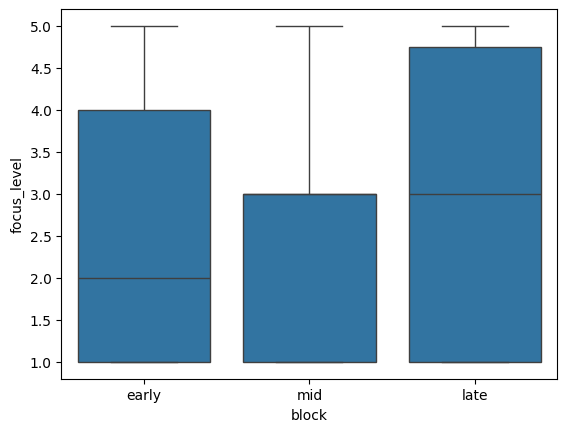

In [283]:
sns.boxplot(data=df, x='block', y='focus_level')
plt.show()

/tmp/ipython-input-2081006014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  focus_distribution_block = df.groupby('block')['focus_level'].mean()


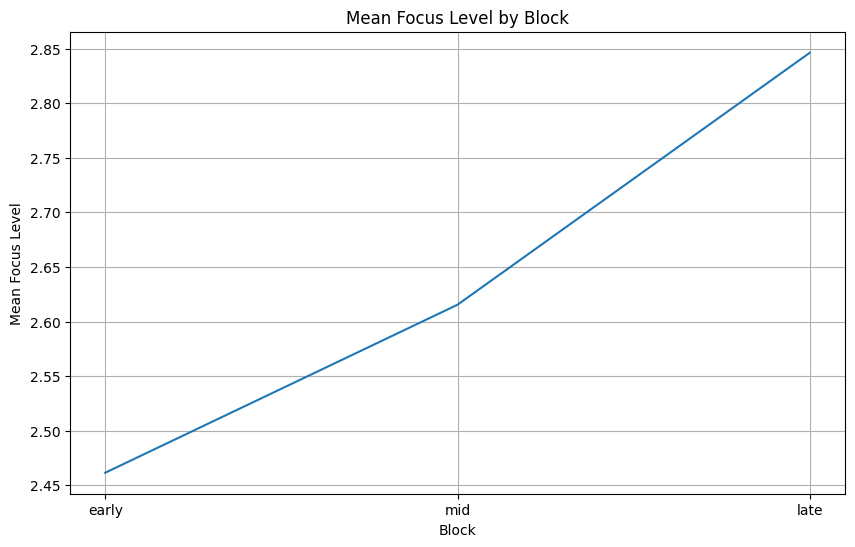

In [284]:
block_order = ['early', 'mid', 'late']
df['block'] = pd.Categorical(df['block'], categories=block_order, ordered=True)

focus_distribution_block = df.groupby('block')['focus_level'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=focus_distribution_block.index, y=focus_distribution_block)
plt.title('Mean Focus Level by Block')
plt.xlabel('Block')
plt.ylabel('Mean Focus Level')
plt.grid(True)
plt.show()

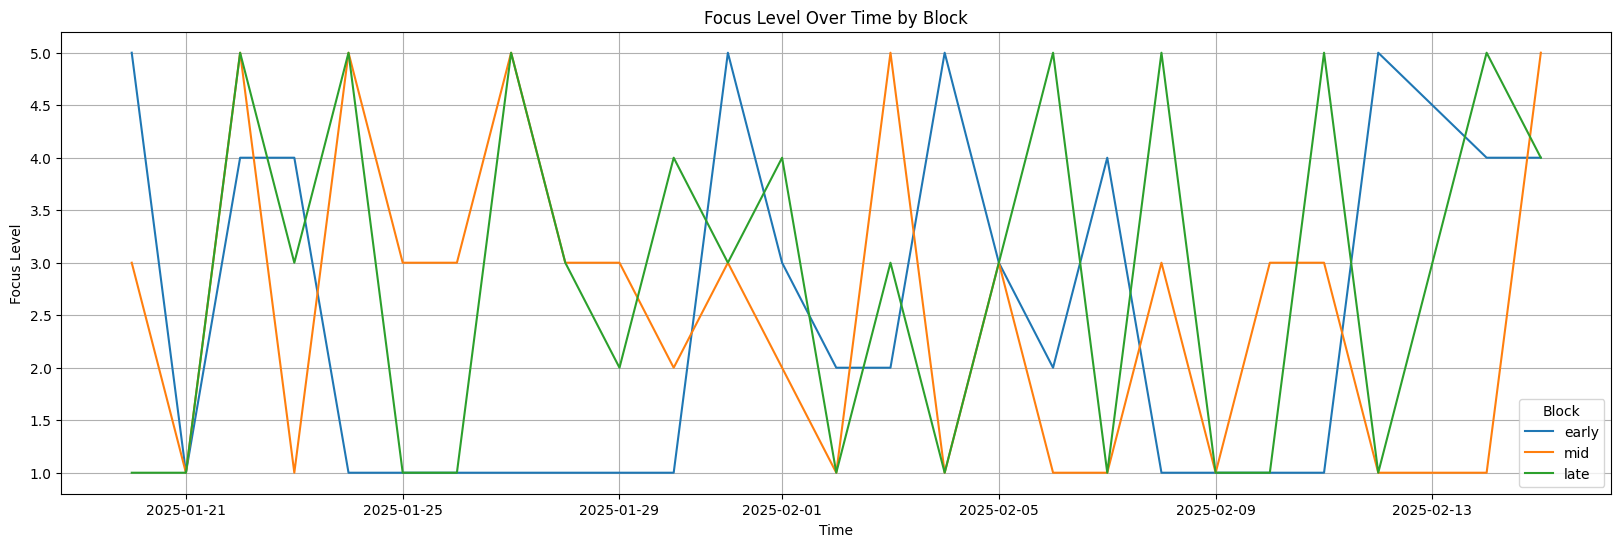

In [285]:

plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y='focus_level', data=df, hue='block')
plt.title('Focus Level Over Time by Block')
plt.xlabel('Time')
plt.ylabel('Focus Level')
plt.legend(title='Block')
plt.grid(True)
plt.show()

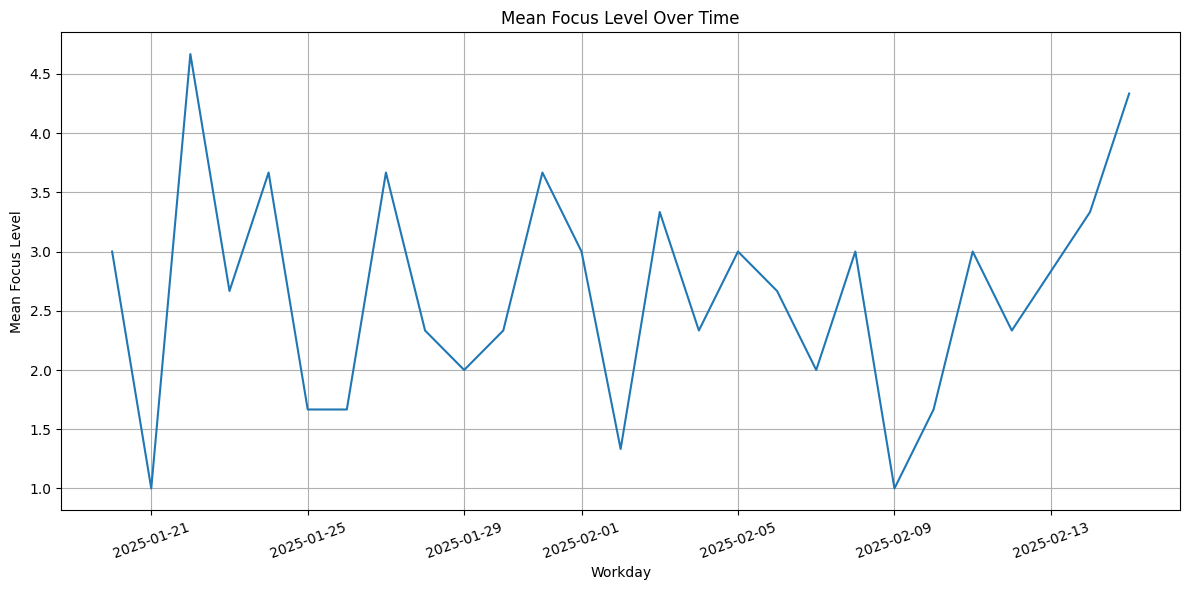

In [286]:
mean_focus_over_time = df.groupby(df.index)['focus_level'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_focus_over_time)
plt.title('Mean Focus Level Over Time')
plt.xlabel('Workday')
plt.ylabel('Mean Focus Level')
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

##DAY LEVEL ANALYSIS

### early and late focus - corr

In [287]:
df.head()

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor,activity_category
workday_id,,,,,,,,,,,,
2025-01-20,11:23:00 AM,early,5.0,1.0,4.0,coding,1,0,1,1,NONE,Productive
2025-01-20,08:25:00 PM,mid,3.0,4.0,1.0,gaming,0,1,1,0,DISCORD W/ FRIENDS,Leisure
2025-01-20,06:35:00 AM,late,1.0,1.0,5.0,sleep,0,0,0,0,NONE,Recovery
2025-01-21,11:22:00 AM,early,1.0,5.0,1.0,leisure,0,1,0,1,BROWSING,Leisure
2025-01-21,10:33:00 PM,mid,1.0,1.0,3.0,outside,0,0,0,0,NONE,Recovery


In [288]:
early_focus = (df[df['block'] == 'early'].groupby('workday_id')['focus_level'].mean())
late_focus = (df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean())

In [289]:
analysis_df = pd.DataFrame({'early_focus': early_focus, 'late_focus': late_focus})
analysis_df.head()

,early_focus,late_focus
workday_id,,
2025-01-20,5.0,2.0
2025-01-21,1.0,1.0
2025-01-22,4.0,5.0
2025-01-23,4.0,2.0
2025-01-24,1.0,5.0


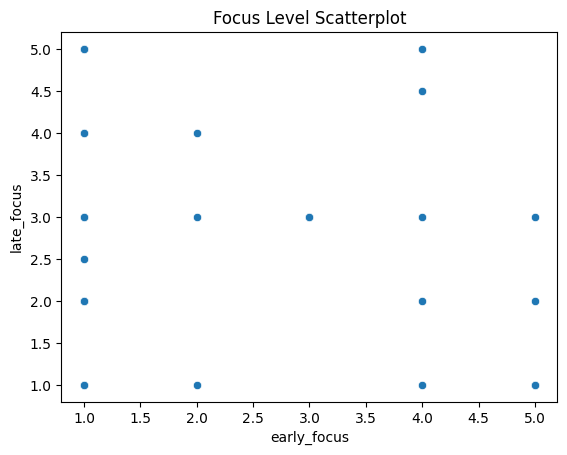

In [290]:
sns.scatterplot(data=analysis_df, x='early_focus', y='late_focus')
plt.title('Focus Level Scatterplot')
plt.show()

In [291]:
analysis_df.shape

(26, 2)

In [292]:
from scipy import stats
from scipy.stats import chi2_contingency

In [293]:
correlation_matrix = analysis_df.corr(method='spearman')
correlation_matrix1 = analysis_df.corr(method='kendall')

print(f"spearman:{correlation_matrix}\n")
print(f"kendall:{correlation_matrix1}")

spearman:             early_focus  late_focus
early_focus     1.000000   -0.166105
late_focus     -0.166105    1.000000

kendall:             early_focus  late_focus
early_focus     1.000000   -0.133106
late_focus     -0.133106    1.000000


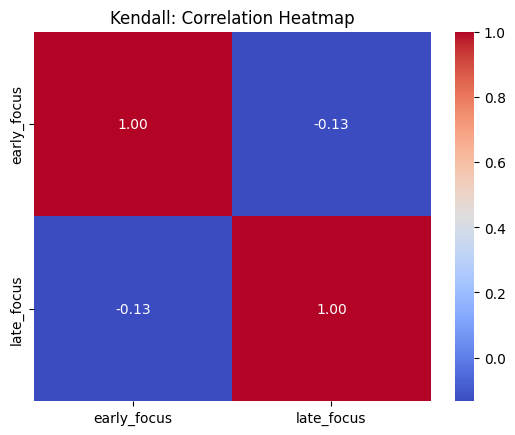

In [294]:
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall: Correlation Heatmap')
plt.show()

In [295]:
from scipy.stats import kendalltau

tau, p = kendalltau(analysis_df['early_focus'],
                    analysis_df['late_focus'])

print("tau:", tau)
print("p-value:", p)


tau: -0.13310630970700407
p-value: 0.41459232939941326


### early distraction and late focus

In [296]:
df.head()

,timestamp,block,focus_level,distraction_level,tired_level,main_activity,work_started_since_wake,non_work_screen_use,music_playing,caffiene_last_log,primary_distractor,activity_category
workday_id,,,,,,,,,,,,
2025-01-20,11:23:00 AM,early,5.0,1.0,4.0,coding,1,0,1,1,NONE,Productive
2025-01-20,08:25:00 PM,mid,3.0,4.0,1.0,gaming,0,1,1,0,DISCORD W/ FRIENDS,Leisure
2025-01-20,06:35:00 AM,late,1.0,1.0,5.0,sleep,0,0,0,0,NONE,Recovery
2025-01-21,11:22:00 AM,early,1.0,5.0,1.0,leisure,0,1,0,1,BROWSING,Leisure
2025-01-21,10:33:00 PM,mid,1.0,1.0,3.0,outside,0,0,0,0,NONE,Recovery


In [297]:
early_focus = df[df['block'] == 'early'].groupby('workday_id')['distraction_level'].mean()
late_focus = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()

In [298]:
df_analysis = pd.DataFrame({'early_distraction': early_focus, 'late_focus': late_focus})
df_analysis.head()

,early_distraction,late_focus
workday_id,,
2025-01-20,1.0,2.0
2025-01-21,5.0,1.0
2025-01-22,3.0,5.0
2025-01-23,1.0,2.0
2025-01-24,5.0,5.0


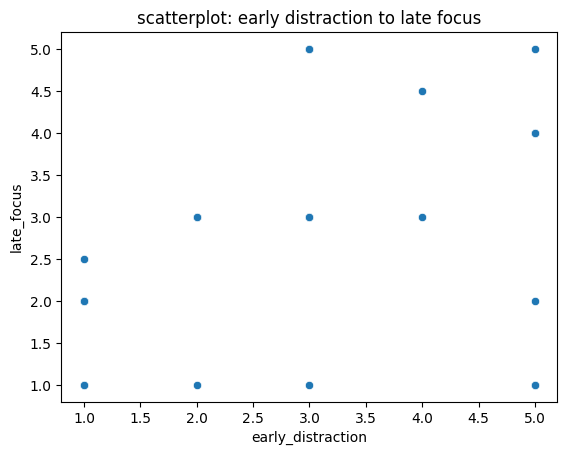

In [299]:
sns.scatterplot(data=df_analysis, x='early_distraction', y='late_focus')
plt.title('scatterplot: early distraction to late focus')
plt.show()

In [300]:
correlation_matrix = df_analysis.corr(method='spearman')
correlation_matrix1 = df_analysis.corr(method='kendall')

print(f"spearman{correlation_matrix}\n")
print(f"kendall{correlation_matrix1}")

spearman                   early_distraction  late_focus
early_distraction           1.000000    0.399077
late_focus                  0.399077    1.000000

kendall                   early_distraction  late_focus
early_distraction           1.000000    0.348403
late_focus                  0.348403    1.000000


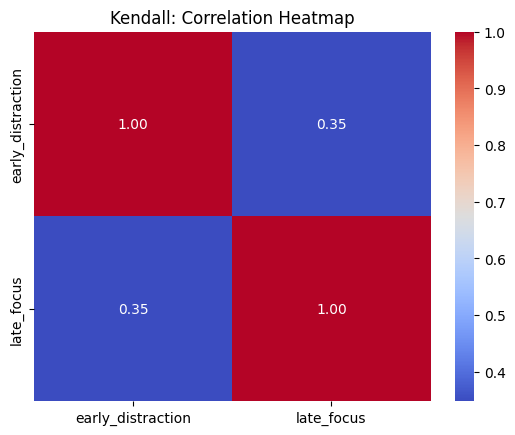

In [301]:
sns.heatmap(data=correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall: Correlation Heatmap')
plt.show()

In [302]:
from scipy.stats import kendalltau

tau, p = kendalltau(df_analysis['early_distraction'], df_analysis['late_focus'])

print("tau:", tau)
print("p-value:", p)

tau: 0.3484025871942876
p-value: 0.030460790240173643


### early tired level (brought about by low qual sleep) and late focus

In [303]:
early_tired = df[df['block'] == 'early'].groupby('workday_id')['tired_level'].mean()
late_focus = df[df['block'] != 'early'].groupby('workday_id')['tired_level'].mean()

In [304]:
df_analysis_3 = pd.DataFrame({'early_tired': early_tired, 'late_focus': late_focus})
df_analysis_3.head()

,early_tired,late_focus
workday_id,,
2025-01-20,4.0,3.0
2025-01-21,1.0,4.0
2025-01-22,1.0,1.0
2025-01-23,1.0,4.0
2025-01-24,2.0,2.0


Text(0.5, 1.0, 'scatterplot: early tired to focus')

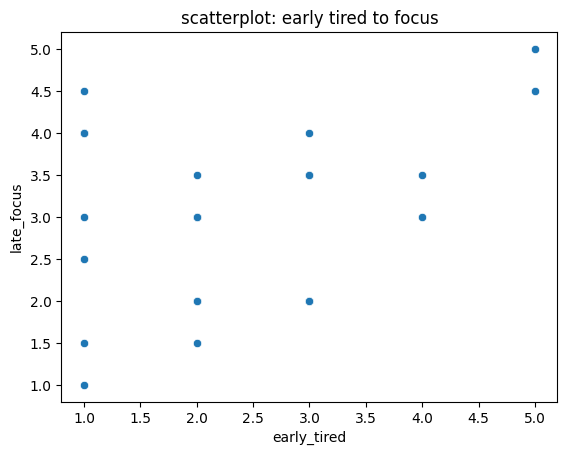

In [305]:
sns.scatterplot(data=df_analysis_3, x='early_tired', y='late_focus')
plt.title('scatterplot: early tired to focus')

In [306]:
correlation_matrix3 = df_analysis_3.corr(method='spearman')
correlation_matrix4 = df_analysis_3.corr(method='kendall')

print(f"spearman: {correlation_matrix3}\n")
print(f"kendall: {correlation_matrix4}")

spearman:              early_tired  late_focus
early_tired     1.000000    0.155911
late_focus      0.155911    1.000000

kendall:              early_tired  late_focus
early_tired     1.000000    0.133832
late_focus      0.133832    1.000000


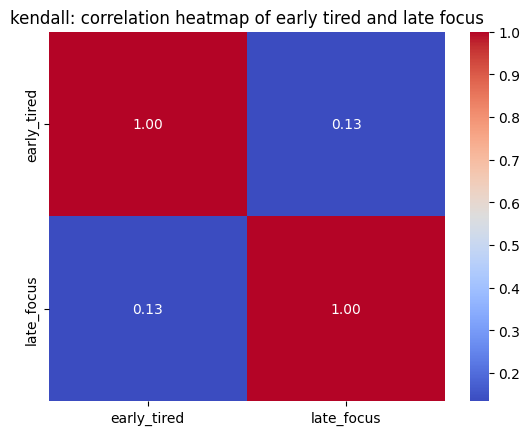

In [318]:
sns.heatmap(data=correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("kendall: correlation heatmap of early tired and late focus")
plt.show()

In [308]:
from scipy.stats import kendalltau

tau, p = kendalltau(df_analysis_3['early_tired'], df_analysis_3['late_focus'])

print("tau:", tau)
print("p-value:", p)

tau: 0.13383177056337775
p-value: 0.4023308103498803


###binaryfeatures

work_started_since_wake
0    2.884615
1    2.576923
Name: focus_level, dtype: float64


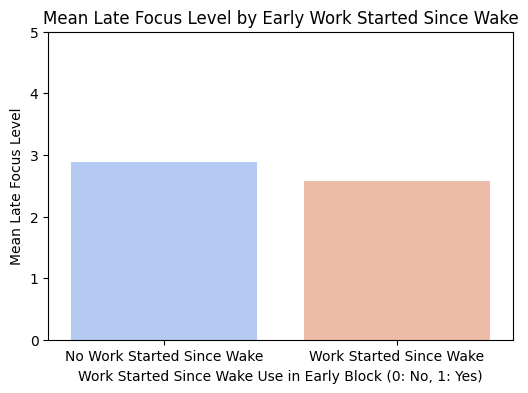

In [325]:
late_focus = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()
is_early_start = df[df['block'] == 'early'].groupby('workday_id')['work_started_since_wake'].first()

comparison = pd.concat([late_focus, is_early_start], axis=1).dropna()

final_comparison = comparison.groupby('work_started_since_wake')['focus_level'].mean()
print(final_comparison)

plt.figure(figsize=(6,4))
sns.barplot(x=final_comparison.index, y=final_comparison.values, palette='coolwarm', hue=final_comparison.index, legend=False)
plt.title('Mean Late Focus Level by Early Work Started Since Wake')
plt.xlabel('Work Started Since Wake Use in Early Block (0: No, 1: Yes)')
plt.ylabel('Mean Late Focus Level')
plt.ylim(0, 5)
plt.xticks([0,1], ['No Work Started Since Wake', 'Work Started Since Wake'])
plt.show()

non_work_screen_use
0    1.785714
1    3.078947
Name: focus_level, dtype: float64


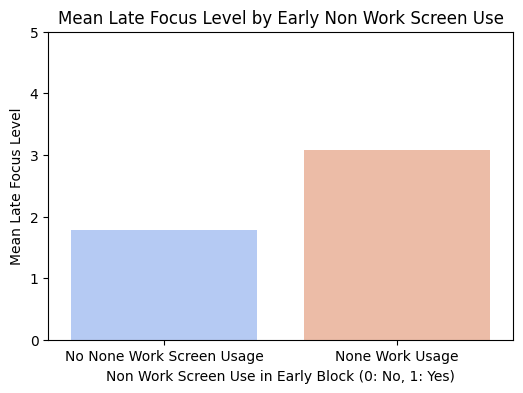

In [310]:
late_focus = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()
is_early_start = df[df['block'] == 'early'].groupby('workday_id')['non_work_screen_use'].first()

comparison = pd.concat([late_focus, is_early_start], axis=1).dropna()

final_comparison = comparison.groupby('non_work_screen_use')['focus_level'].mean()
print(final_comparison)

plt.figure(figsize=(6,4))
sns.barplot(x=final_comparison.index, y=final_comparison.values, palette='coolwarm', hue=final_comparison.index, legend=False)
plt.title('Mean Late Focus Level by Early Non Work Screen Use')
plt.xlabel('Non Work Screen Use in Early Block (0: No, 1: Yes)')
plt.ylabel('Mean Late Focus Level')
plt.ylim(0, 5)
plt.xticks([0,1], ['No None Work Screen Usage', 'None Work Usage'])
plt.show()

music_playing
0    2.529412
1    3.111111
Name: focus_level, dtype: float64


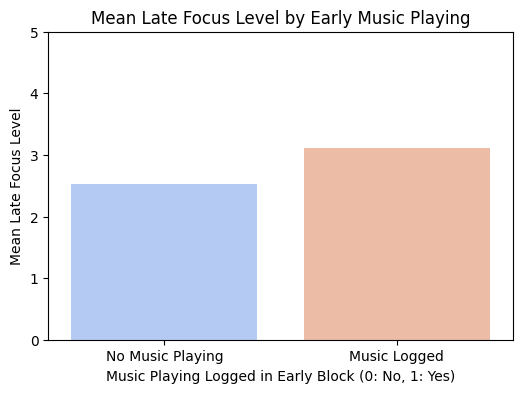

In [311]:
late_focus = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()
is_early_start = df[df['block'] == 'early'].groupby('workday_id')['music_playing'].first()

comparison = pd.concat([late_focus, is_early_start], axis=1).dropna()

final_comparison = comparison.groupby('music_playing')['focus_level'].mean()
print(final_comparison)

plt.figure(figsize=(6,4))
sns.barplot(x=final_comparison.index, y=final_comparison.values, palette='coolwarm', hue=final_comparison.index, legend=False)
plt.title('Mean Late Focus Level by Early Music Playing')
plt.xlabel('Music Playing Logged in Early Block (0: No, 1: Yes)')
plt.ylabel('Mean Late Focus Level')
plt.ylim(0, 5)
plt.xticks([0,1], ['No Music Playing', 'Music Logged'])
plt.show()

caffiene_last_log
0    2.375000
1    3.035714
Name: focus_level, dtype: float64


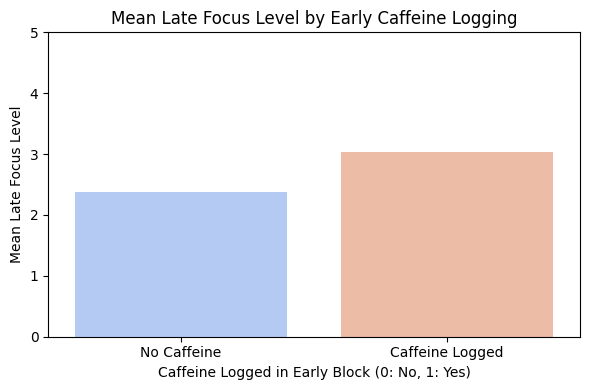

In [312]:
late_focus = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()
is_early_start = df[df['block'] == 'early'].groupby('workday_id')['caffiene_last_log'].first()

comparison = pd.concat([late_focus, is_early_start], axis=1).dropna()

final_comparison = comparison.groupby('caffiene_last_log')['focus_level'].mean()
print(final_comparison)

plt.figure(figsize=(6,4))
sns.barplot(x=final_comparison.index, y=final_comparison.values, palette='coolwarm', hue=final_comparison.index, legend=False)
plt.title('Mean Late Focus Level by Early Caffeine Logging')
plt.xlabel('Caffeine Logged in Early Block (0: No, 1: Yes)')
plt.ylabel('Mean Late Focus Level')
plt.ylim(0, 5)
plt.xticks([0, 1], ['No Caffeine', 'Caffeine Logged'])
plt.tight_layout()
plt.show()

In [313]:
from scipy.stats import mannwhitneyu

binary_features = ['work_started_since_wake', 'caffiene_last_log', 'non_work_screen_use', 'music_playing']

results = []

for feature in binary_features:
    feature_status = df[df['block'] == 'early'].groupby('workday_id')[feature].first()
    feature_status = pd.to_numeric(feature_status, errors='coerce')
    temp_df = pd.concat([late_focus, feature_status], axis=1).dropna()

    group_1 = temp_df[temp_df[feature] == 1]['focus_level']
    group_0 = temp_df[temp_df[feature] == 0]['focus_level']

    if len(group_1) > 0 and len(group_0) > 0:
        stat, p = mannwhitneyu(group_1, group_0)
        results.append({'feature': feature, 'p_value': p, 'mean_diff': group_1.mean() - group_0.mean()})

results_df = pd.DataFrame(results)
print(results_df)

                   feature   p_value  mean_diff
0  work_started_since_wake  0.600569  -0.307692
1        caffiene_last_log  0.247966   0.660714
2      non_work_screen_use  0.021347   1.293233
3            music_playing  0.308671   0.581699


In [314]:
from math import sqrt

def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    if dof == 0:
        return float('nan')

    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std(ddof=1)
    std_y = y.std(ddof=1)

    pooled_std = sqrt(((nx - 1) * std_x**2 + (ny - 1) * std_y**2) / dof)

    if pooled_std == 0:
        return 0.0
    return (mean_x - mean_y) / pooled_std

cohens_d_values = []

for feature in binary_features:
    feature_status = df[df['block'] == 'early'].groupby('workday_id')[feature].first()
    feature_status = pd.to_numeric(feature_status, errors='coerce')
    temp_df = pd.concat([late_focus, feature_status], axis=1).dropna()

    group_1 = temp_df[temp_df[feature] == 1]['focus_level']
    group_0 = temp_df[temp_df[feature] == 0]['focus_level']

    if len(group_1) > 1 and len(group_0) > 1:
        d_val = cohen_d(group_1, group_0)
        cohens_d_values.append(d_val)
    else:
        cohens_d_values.append(float('nan'))

results_df['cohens_d'] = cohens_d_values
print(results_df)

                   feature   p_value  mean_diff  cohens_d
0  work_started_since_wake  0.600569  -0.307692 -0.227246
1        caffiene_last_log  0.247966   0.660714  0.500679
2      non_work_screen_use  0.021347   1.293233  1.055039
3            music_playing  0.308671   0.581699  0.436492


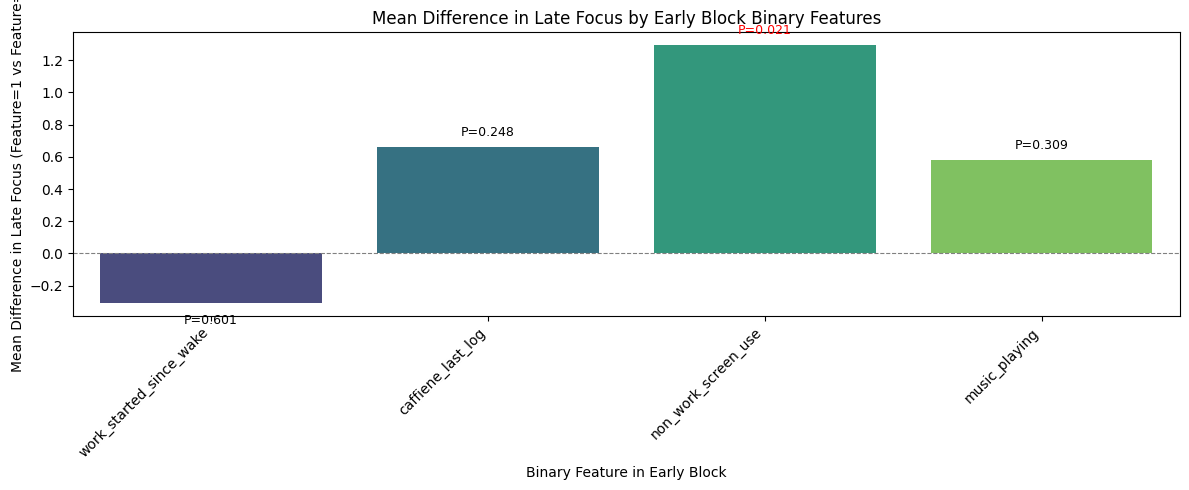

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x='feature', y='mean_diff', data=results_df, palette='viridis', hue='feature', legend=False)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) #

for index, row in results_df.iterrows():
    p_val_text = f"P={row['p_value']:.3f}"
    color = 'red' if row['p_value'] < 0.05 else 'black'
    plt.text(index, row['mean_diff'] + (0.05 if row['mean_diff'] >= 0 else -0.15), p_val_text,
             color=color, ha='center', va='bottom', fontsize=9)

plt.title('Mean Difference in Late Focus by Early Block Binary Features')
plt.xlabel('Binary Feature in Early Block')
plt.ylabel('Mean Difference in Late Focus (Feature=1 vs Feature=0)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

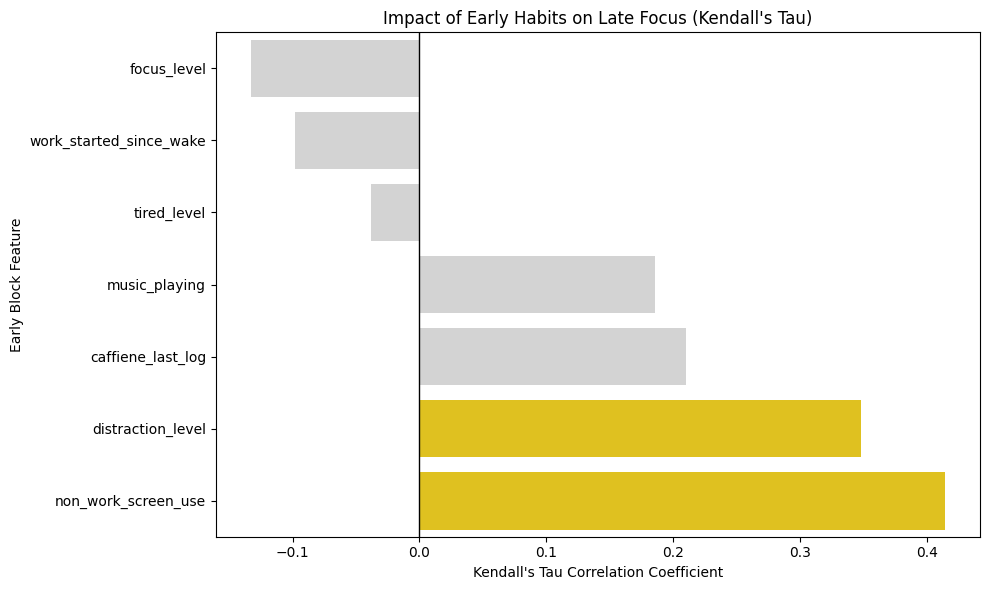

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols_mode = ['work_started_since_wake', 'non_work_screen_use', 'music_playing', 'caffiene_last_log']
for col in cols_mode:
    df[col] = pd.to_numeric(df[col], errors='coerce')

features = ['focus_level', 'distraction_level', 'tired_level',
            'work_started_since_wake', 'non_work_screen_use', 'music_playing', 'caffiene_last_log']

early_features_df = df[df['block'] == 'early'].groupby('workday_id')[features].mean()
target_late_focus = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()

target_late_focus_renamed = target_late_focus.rename('late_focus_mean')
combined_df = pd.concat([early_features_df, target_late_focus_renamed], axis=1).dropna()

full_correlation_matrix = combined_df.corr(method='kendall')
correlations = full_correlation_matrix['late_focus_mean'][features].sort_values()
colors = ['gold' if (abs(val) > 0.3) else 'lightgrey' for val in correlations.values]

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette=colors, hue=correlations.index, legend=False)
plt.axvline(0, color='black', lw=1)
plt.title("Impact of Early Habits on Late Focus (Kendall's Tau)")
plt.xlabel("Kendall's Tau Correlation Coefficient")
plt.ylabel("Early Block Feature")
plt.tight_layout()
plt.show()

Summary thus far
1. Checked block level pattern (linear increase in focus level (early to late))
2. Checked Overall Mean focus pattern over the recorded days (erratic - no linear pattern)
3. started Univariate checking for all features starting with ordinal features (1-5 ratings)
4. tested for correlation and statistical significance between these features and dependent variable focus(mean(mid, late))
5. continued testing but now for binary features using difference (mann - whitney)
6. included cohens difference checking for these binary features


### categorical feature - activity type

In [253]:
early_activity.value_counts()

,count
activity_category,
Productive,13
Leisure,7
Recovery,6


In [254]:
from scipy.stats import kruskal

late_focus_series = df[df['block'] != 'early'].groupby('workday_id')['focus_level'].mean()

aligned_data = pd.DataFrame({
    'late_focus': late_focus_series,
    'early_activity_category': early_activity
}).dropna()

unique_categories = aligned_data['early_activity_category'].unique()

groups = []
for category in unique_categories:
    group_data = aligned_data[aligned_data['early_activity_category'] == category]['late_focus']
    if not group_data.empty:
        groups.append(group_data)

if len(groups) >= 2:
    stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis H-test statistic: {stat:.2f}")
    print(f"P-value: {p:.3f}")
else:
    print("Not enough groups with data to perform Kruskal-Wallis test.")

Kruskal-Wallis H-test statistic: 1.09
P-value: 0.579


In [255]:
import pandas as pd

breakdown = df.groupby(['activity_category', 'non_work_screen_use']).size().unstack(fill_value=0)

breakdown.columns = ['No Screen Use (0)', 'Screen Use (1)']
breakdown['Total Entries'] = breakdown['No Screen Use (0)'] + breakdown['Screen Use (1)']
breakdown['% Screen Use'] = (breakdown['Screen Use (1)'] / breakdown['Total Entries']) * 100

display(breakdown.round(2))

,No Screen Use (0),Screen Use (1),Total Entries,% Screen Use
activity_category,,,,
Leisure,1,15,16,93.75
Productive,12,28,40,70.00
Recovery,11,8,19,42.11


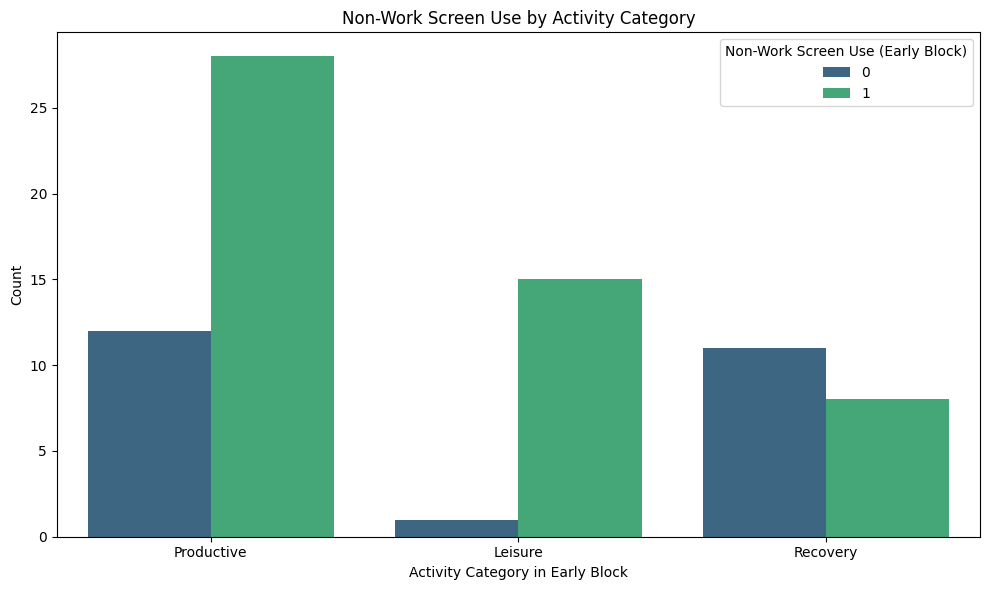

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df.reset_index(), x='activity_category', hue='non_work_screen_use', palette='viridis')
plt.title('Non-Work Screen Use by Activity Category')
plt.xlabel('Activity Category in Early Block')
plt.ylabel('Count')
plt.legend(title='Non-Work Screen Use (Early Block)')
plt.tight_layout()
plt.show()